In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def plot(OFF, bin_centers,hist, bins, m=False, func=False, title=''):
    idx = OFF > 0
    fig = plt.figure(figsize=(15, 6))
    fig.tight_layout()
    plt.errorbar(bin_centers, hist,np.sqrt(hist+1), alpha=0.5, label='Data', fmt='ko', color='blue')
    plt.hist(OFF[idx],bins,histtype='bar',color='lightblue',density=False,alpha=0.5)
    plt.xlabel('[A.U.]')
    plt.ylabel('Counts')
    plt.title(title)
    plt.grid(True)

    if m and func:
        plt.errorbar(bin_centers, func(bin_centers,*m.values),np.sqrt(func(bin_centers,*m.values)), fmt='ko',color='black',linestyle='-', label='MIGRAD',alpha=0.8)

        title = []
        for par in m.parameters:
            title.append(
                f"{par} = {m.values[par]:.5f} +/- {m.errors[par]:.5f}"
            )
        title.append(r'$\chi^{2}_{0} = $'+f"{m.fval/m.ndof:.2f}")

        # Create the legend
        legend = plt.legend(title="\n".join(title),fontsize=10)

        # Adjust the title's font size
        legend.get_title().set_fontsize(10)  # or use a numeric value like 8

In [35]:
OFF = np.genfromtxt('/home/drtofa/OneDrive/QTLab2324/DATA ANALYSIS/OPTIMUM/TXT/maxs.txt')

In [36]:
bins = 20  # Number of bins
hist, bin_edges = np.histogram(OFF, bins=bins, density=False)
# Calculate bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

/tmp/ipykernel_5663/2832061085.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ko" (-> color='k'). The keyword argument will take precedence.
  plt.errorbar(bin_centers, hist,np.sqrt(hist+1), alpha=0.5, label='Data', fmt='ko', color='blue')


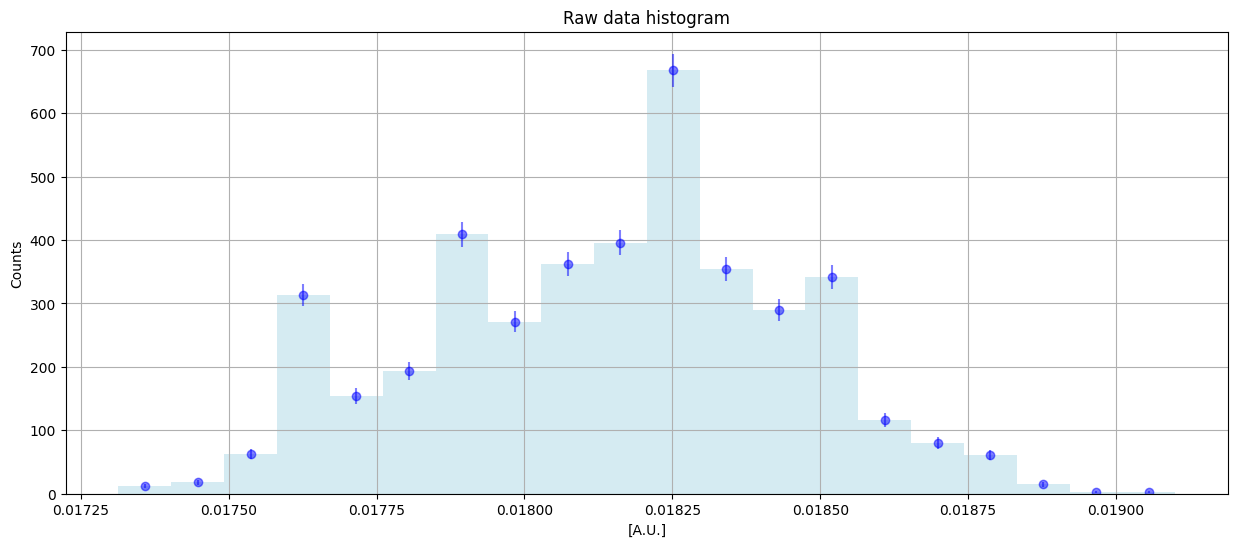

In [37]:
plot(OFF,bin_centers,hist,bins,title='Raw data histogram')

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with h5py.File('/home/drtofa/OneDrive/QTLab2324/DATA ANALYSIS/RUN_10_PULSE_999.hdf5','r') as hdf5:
    I = hdf5['Signals']['I'][:]
    Q = hdf5['Signals']['Q'][:]

In [6]:
rms_i_signal = np.sqrt(np.sum(I[np.argmin(I)-1000:np.argmin(I)+19000]**2)/2e4)
rms_i_noise  = np.sqrt(np.sum(I[I.shape[0]-10000:]**2)/(10000))

print(f'RMS_I_signal : {rms_i_signal}')
print(f'RMS_I_noise  : {rms_i_noise}')

RMS_I_signal : 0.01682411882985201
RMS_I_noise  : 0.017045397352541593


In [7]:
rms_q_signal = np.sqrt(np.sum(Q[np.argmin(I)-1000:np.argmin(I)+19000]**2)/2e4)
rms_q_noise  = np.sqrt(np.sum(Q[I.shape[0]-10000:]**2)/(10000))

print(f'RMS_Q_signal : {rms_q_signal}')
print(f'RMS_Q_noise  : {rms_q_noise}')

RMS_Q_signal : 0.030252975799848335
RMS_Q_noise  : 0.030195949820292764


In [23]:
S21 = 20*np.log10(np.sqrt(I**2+Q**2))
P   = np.unwrap(np.angle(1j*I+Q)) 
ts = np.linspace(0,I[np.argmin(I)-1000:np.argmin(I)+19000].shape[0],I[np.argmin(I)-1000:np.argmin(I)+19000].shape[0])

In [16]:
rms_S21_signal = np.sqrt(np.sum(S21[np.argmin(I)-1000:np.argmin(I)+19000]**2)/2e4)
rms_S21_noise  = np.sqrt(np.sum(S21[I.shape[0]-10000:]**2)/(10000))

print(f'RMS_S21_signal : {rms_S21_signal}')
print(f'RMS_S21_noise  : {rms_S21_noise}')

RMS_S21_signal : 29.21493896744096
RMS_S21_noise  : 29.200248857704892


In [11]:
rms_P_signal = np.sqrt(np.sum(P[np.argmin(I)-1000:np.argmin(I)+19000]**2)/2e4)
rms_P_noise  = np.sqrt(np.sum(P[I.shape[0]-10000:]**2)/(10000))

print(f'RMS_P_signal : {rms_P_signal}')
print(f'RMS_P_noise  : {rms_P_noise}')

RMS_P_signal : 2.634236181587331
RMS_P_noise  : 2.6277599101022333


In [21]:
print(f'SNR(I  ) = {20*np.log10(rms_i_signal/rms_i_noise)}')
print(f'SNR(Q  ) = {20*np.log10(rms_q_signal/rms_q_noise)}')
print(f'SNR(S21) = {20*np.log10(rms_S21_signal/rms_S21_noise)}')
print(f'SNR(P  ) = {20*np.log10(rms_P_signal/rms_P_noise)}')

SNR(I  ) = -0.11349605135459671
SNR(Q  ) = 0.0163880997645157
SNR(S21) = 0.004368613005585387
SNR(P  ) = 0.02138055855942783


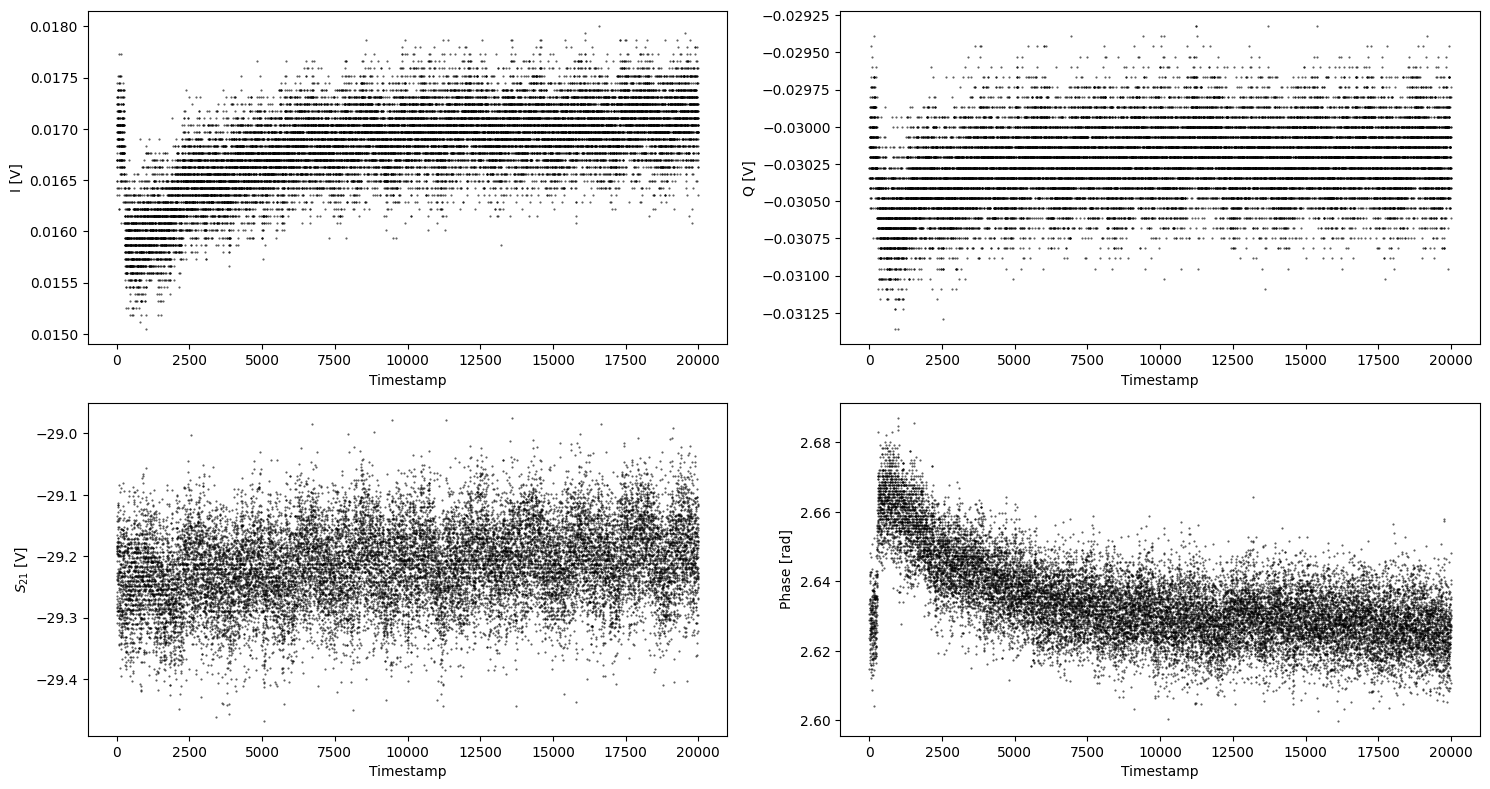

In [24]:
fig, axs = plt.subplots(2,2,figsize=(15,8))
axs[0][0].scatter(ts,I[np.argmin(I)-1000:np.argmin(I)+19000],marker='.',s=1,color='black',alpha=0.7,label='I Channel')
axs[0][0].set_xlabel('Timestamp')
axs[0][0].set_ylabel('I [V]')


axs[0][1].scatter(ts,Q[np.argmin(I)-1000:np.argmin(I)+19000],marker='.',s=1,color='black',alpha=0.7,label='Q Channel')
axs[0][1].set_xlabel('Timestamp')
axs[0][1].set_ylabel('Q [V]')

axs[1][0].scatter(ts,S21[np.argmin(I)-1000:np.argmin(I)+19000],marker='.',s=1,color='black',alpha=0.7,label='$S_{21}$')
axs[1][0].set_xlabel('Timestamp')
axs[1][0].set_ylabel('$S_{21}$ [V]')

axs[1][1].scatter(ts,P[np.argmin(I)-1000:np.argmin(I)+19000],marker='.',s=1,color='black',alpha=0.7,label='Phase')
axs[1][1].set_xlabel('Timestamp')
axs[1][1].set_ylabel('Phase [rad]')
fig.tight_layout()